In [30]:
import os 
#os.chdir('/home/clchupin1/IA_chupin/bench_all')
from utils_lib.utils import Utils
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from itertools import cycle
cycol = cycle('bgrcmk')
utils = Utils()

In [31]:



def get_path(policie_name,env_name,fe_k,fev_l,index=0):
    global util
    #util.all_feature_extractor[]
    return os.path.join(os.getcwd(), ("./result/log_json/" +
    policie_name+ "/" +
    env_name+"/"+
    utils.all_feature_extractor[fe_k]["name"] + "_v" +
    str(utils.all_feature_extractor[fe_k]["order"][fev_l]) + "_i" +
    str(index) +".json"
    ))

def plot_one_file(plot_target,policy=None,env=None,fe_k=None,fe_v_k=None,label_plot="",color=None,marker=None,index=0,envs=utils.all_envs,policies=utils.all_policies):
    policy = policies[policy]
    env = envs[env]
    path_log = get_path(
        policie_name=policy["name"],
        env_name=env["name"],
        fe_k=fe_k,
        fev_l=fe_v_k,
        index=index)
    print(path_log)

    #path_log="../test.json"
    #print(path_log)
    data = []
    time = []
    if os.path.exists(path_log):
        print("found")
        #print(path_log)

        with open(path_log, 'r') as fd:
            lines = fd.read().split('\n')
            for l in lines:
                split_array=l.split(",")
                if len(split_array)==5:
                    #print(len(split_array))
                    time.append(float(split_array[0]))
                    data.append(float(split_array[2]))

        data = np.array(data)
        time = np.array(time)
        # print(data)
        if not(len(data) < 40 or len(time) <40):
            ti_li = savgol_filter(time, 40, 1)
            data_li = savgol_filter(data, 40, 1)
            #plt.legend()
            plot_target.plot(ti_li,data_li,label=label_plot,c=color, marker=marker,)


In [32]:
a = [1,2,3]
a.pop(1)
a

[1, 3]

In [33]:
utils.all_envs[8]["env"]

'Swimmer-v4'

/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/ant/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/halfcheetah/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/hopper/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/humanoidstandup/none_v0_i11011.json
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/humanoid/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/inverteddoublependulum/none_v0_i11011.json
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/invertedpendulum/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/reacher/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/swimmer/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/walker2d/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/acrobot/none_v0_i11011.

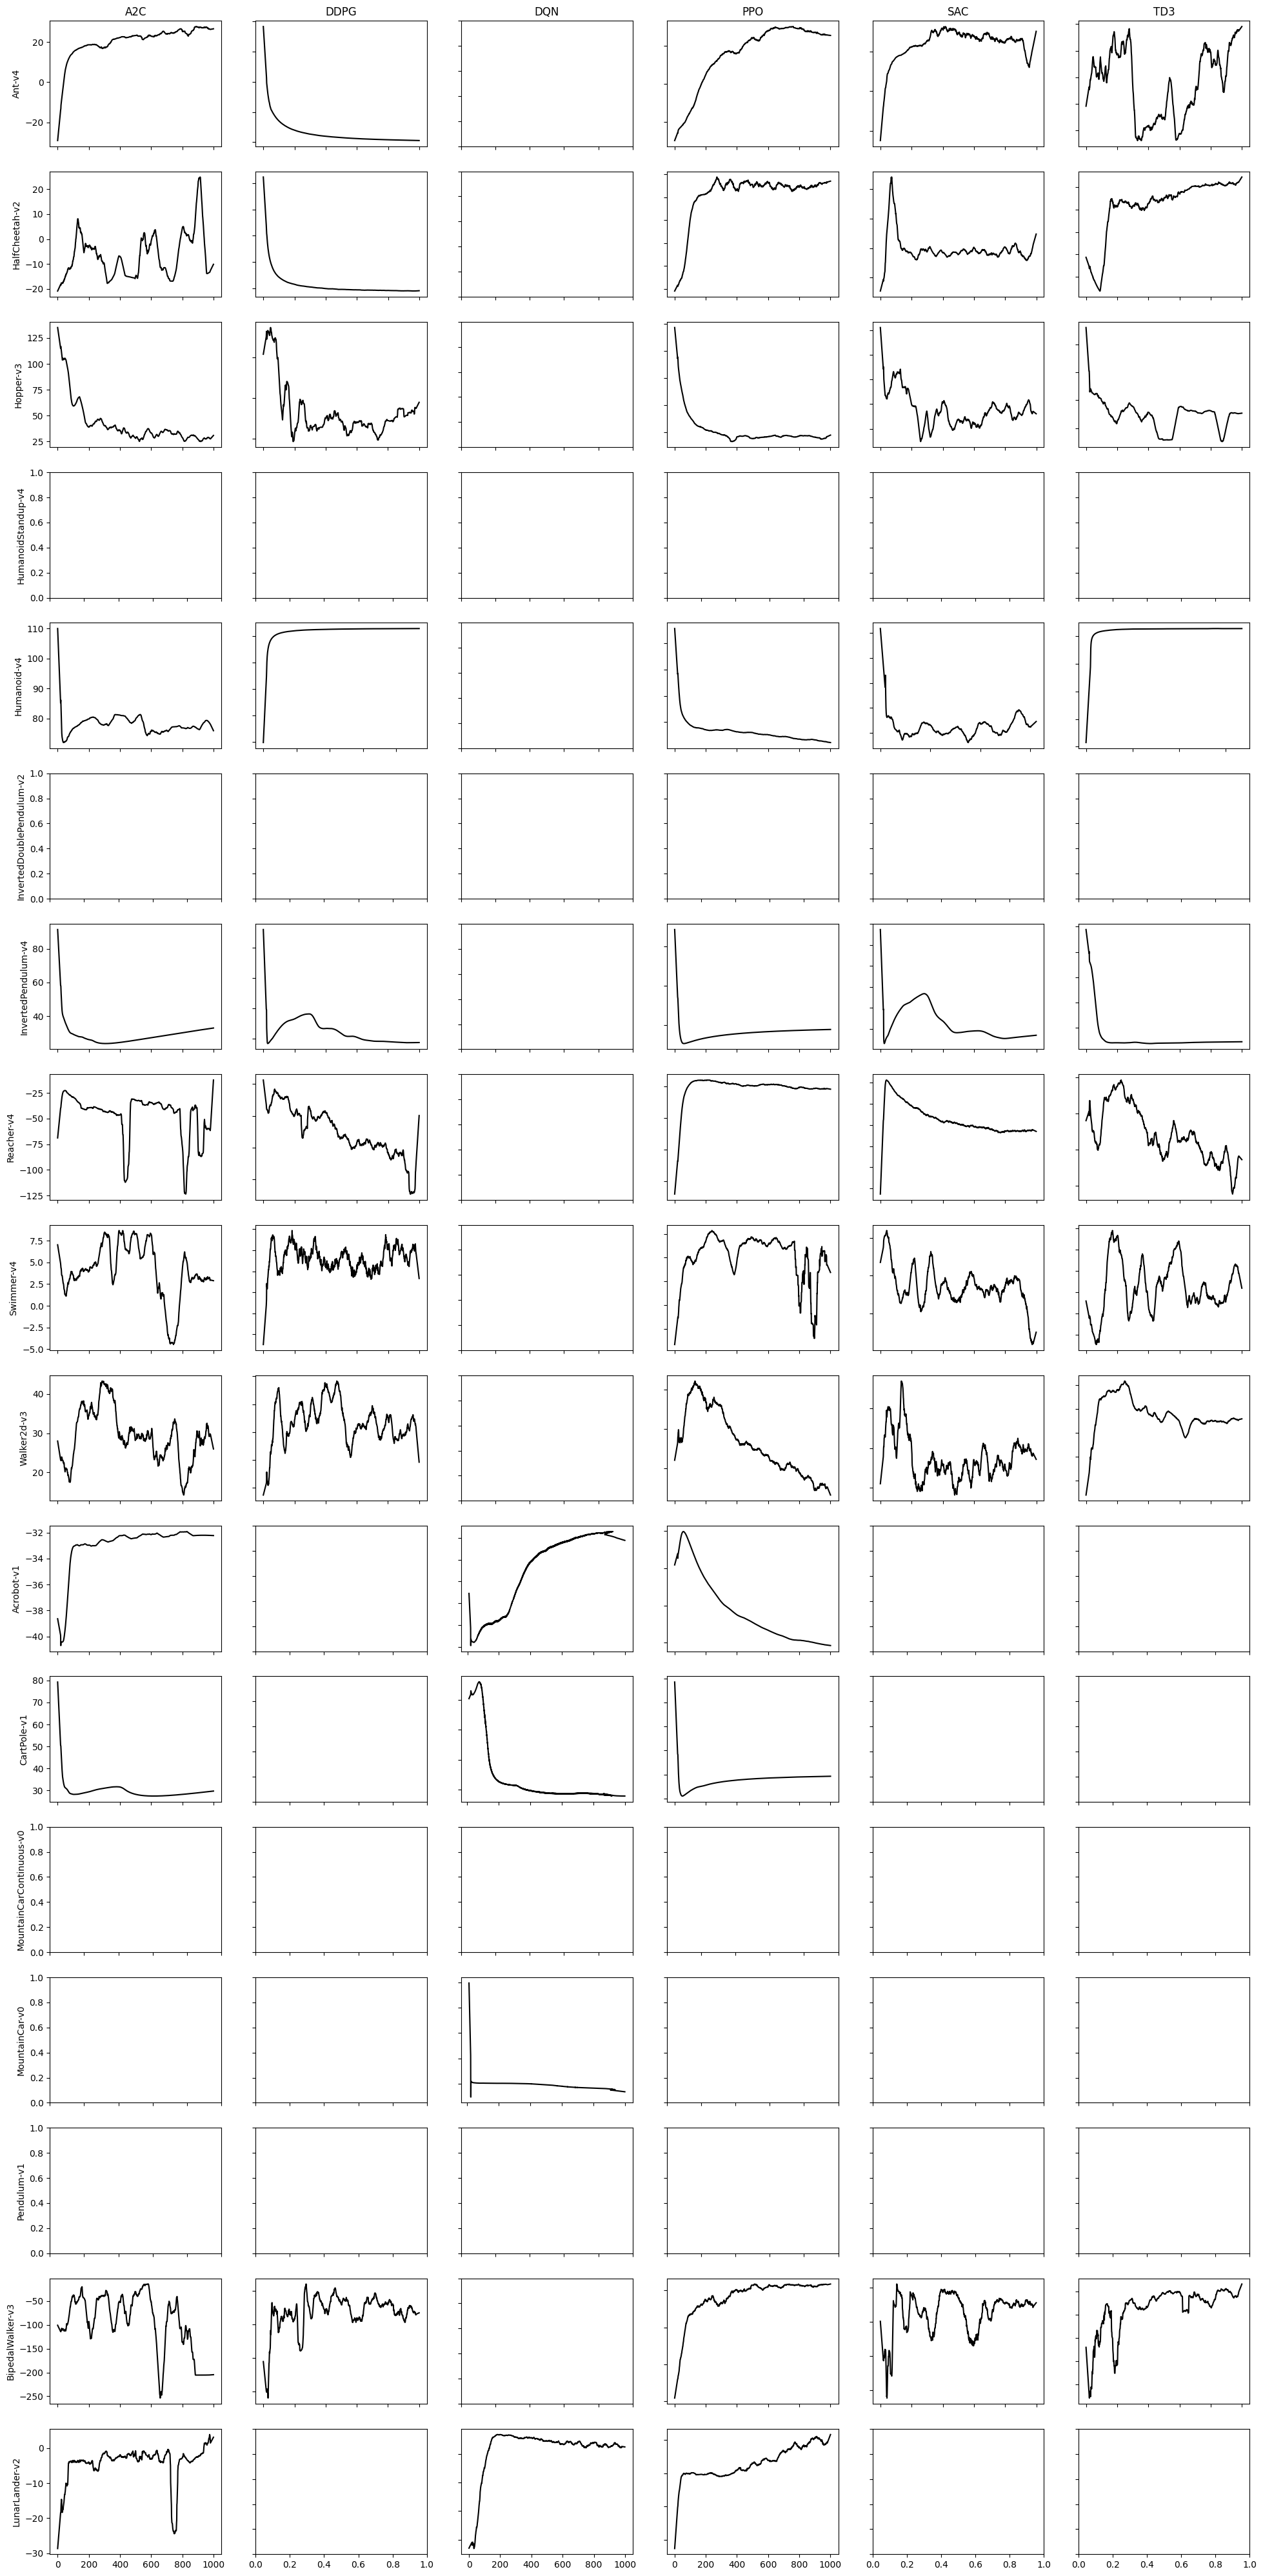

In [34]:
def grid_plot_base(N_policie = 6,M_envs = 16,k=0,l=0,index_plt=11011,envs=utils.all_envs,policies=utils.all_policies):
    M_envs = len(envs)
    N_policie = len(policies)
    
    fig, axs = plt.subplots(M_envs, N_policie, figsize=(N_policie*4,M_envs*3))
    for i,policy in enumerate(policies[:N_policie]):
        axs[0,i].set_title(policy["name"])  
    for ax in axs.flat:
        #ax.set(xlabel='timestep', ylabel='reward')
        ax.label_outer()

    for i,ax in enumerate(axs[:,0].flat):
        ax.set(ylabel=envs[i]["env"])

    for i in range(N_policie):
        for j in range(M_envs):
            if k==0:
                plot_one_file(
                    axs[j,i],i,j,k,l,
                    label_plot=utils.all_feature_extractor[k]["name"]+"_"+str(utils.all_feature_extractor[k]["order"][l]),
                    color="#000",
                    index=index_plt,
                    envs=envs,
                    policies=policies
                    )
            else:
                plot_one_file(
                    axs[j,i],i,j,k,l,
                    label_plot=utils.all_feature_extractor[k]["name"]+"_"+str(utils.all_feature_extractor[k]["order"][l]),
                    index=index_plt,
                    envs=envs,
                    policies=policies
                    )

grid_plot_base()


/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/ant/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/halfcheetah/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/hopper/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/reacher/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/swimmer/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/walker2d/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/bipedalwalker/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DDPG/ant/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DDPG/halfcheetah/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DDPG/hopper/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DDPG/reacher/none_v0_i11011.json
found
/

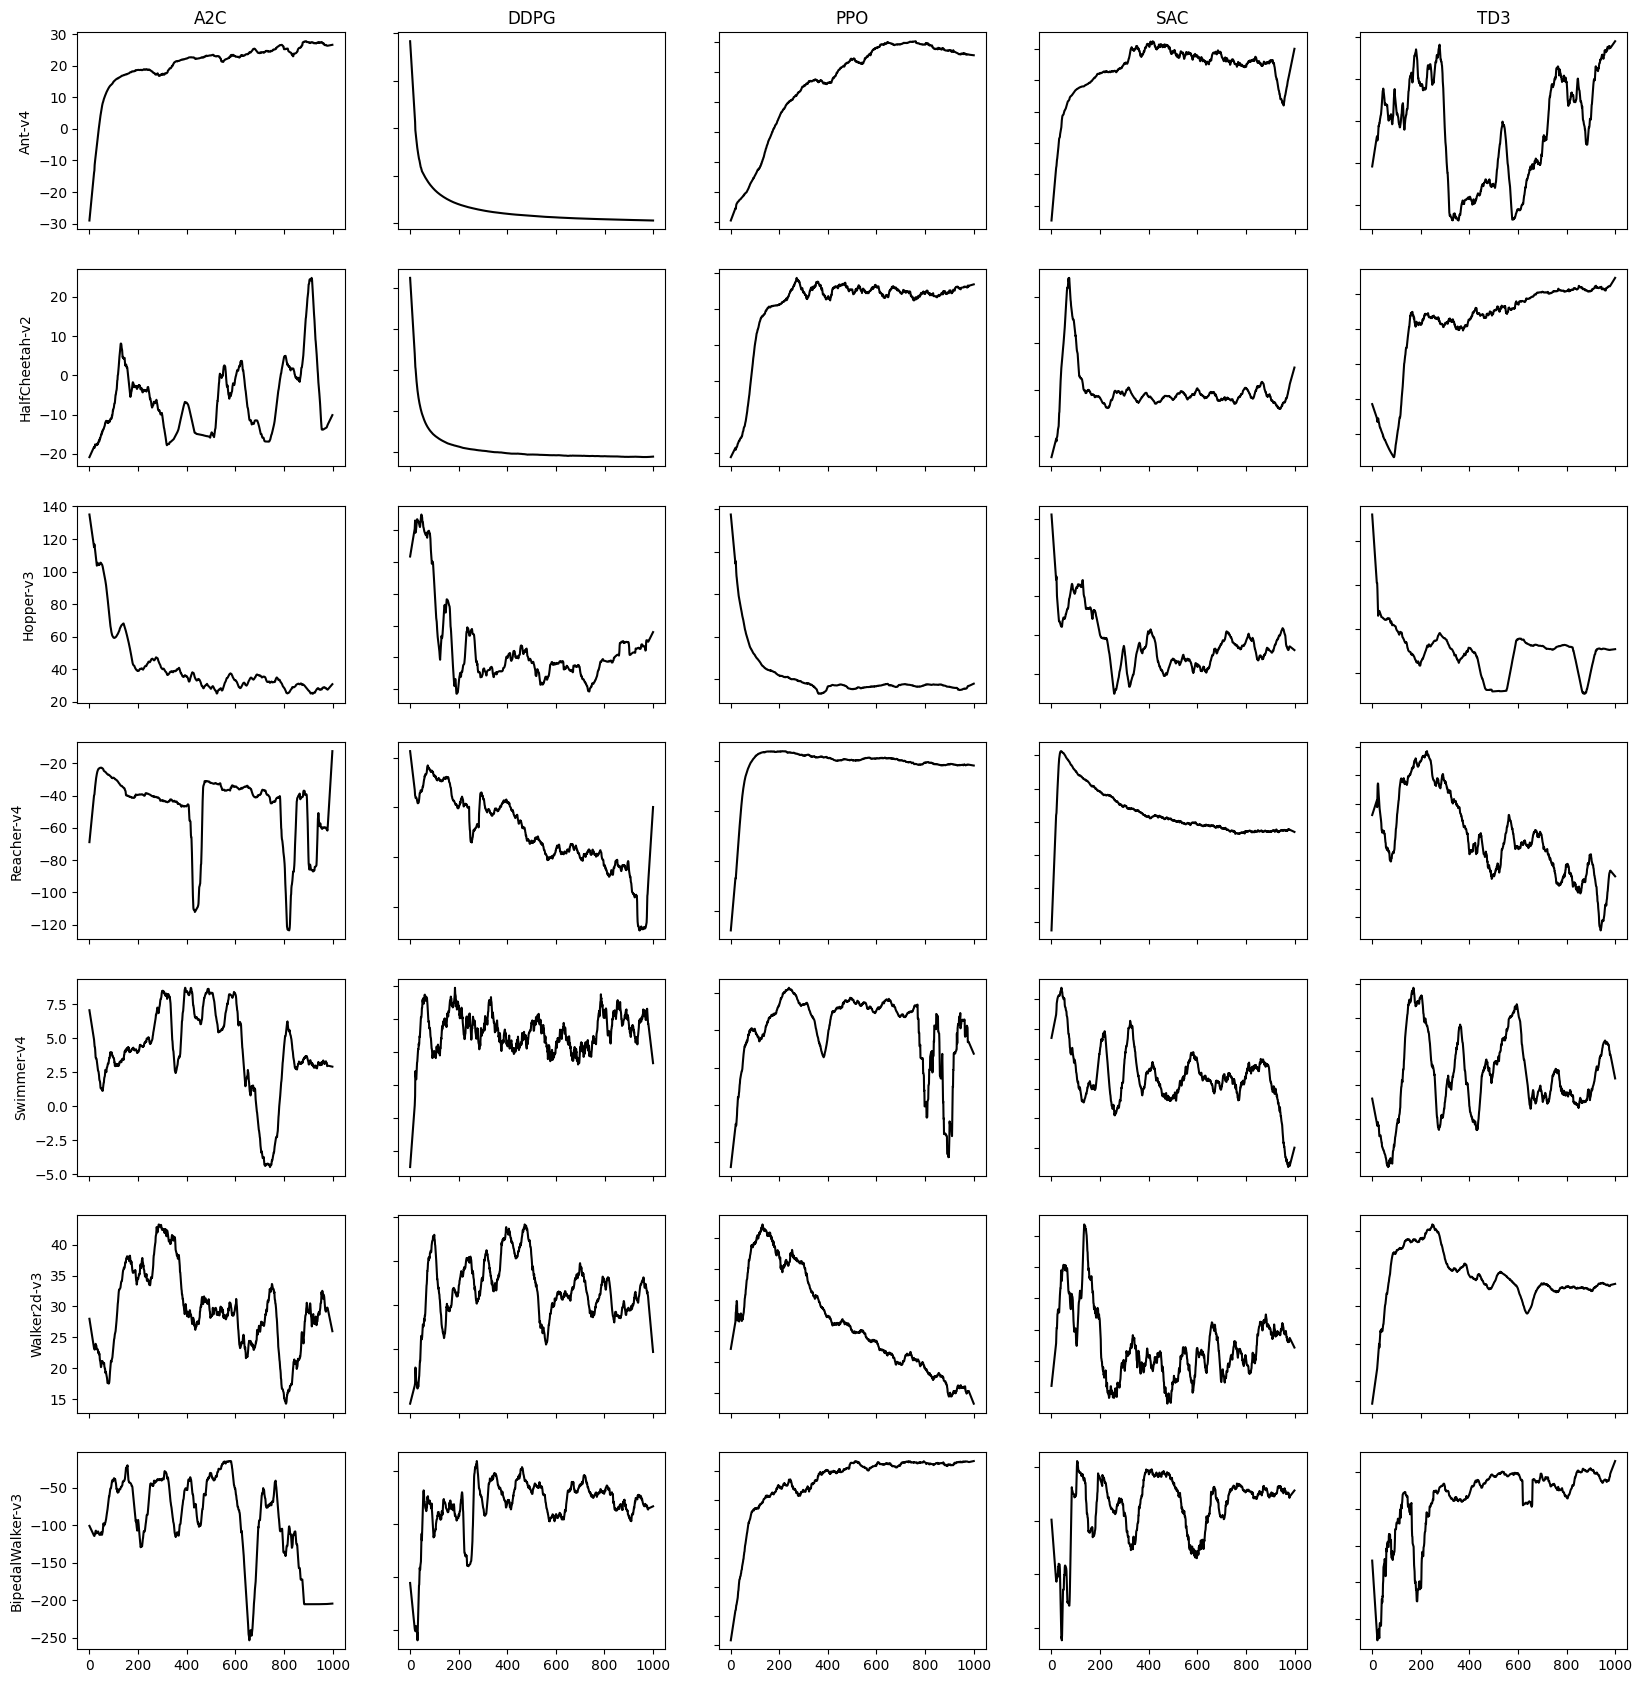

In [36]:
grid_plot_base(envs=utils.all_envs_robotics,policies=utils.all_policies_robotics)

/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/acrobot/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/cartpole/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/A2C/lunarlander/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/acrobot/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/cartpole/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/PPO/lunarlander/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/acrobot/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/cartpole/none_v0_i11011.json
found
/home/a/Desktop/BenchNeuralNework/./result/log_json/DQN/lunarlander/none_v0_i11011.json
found


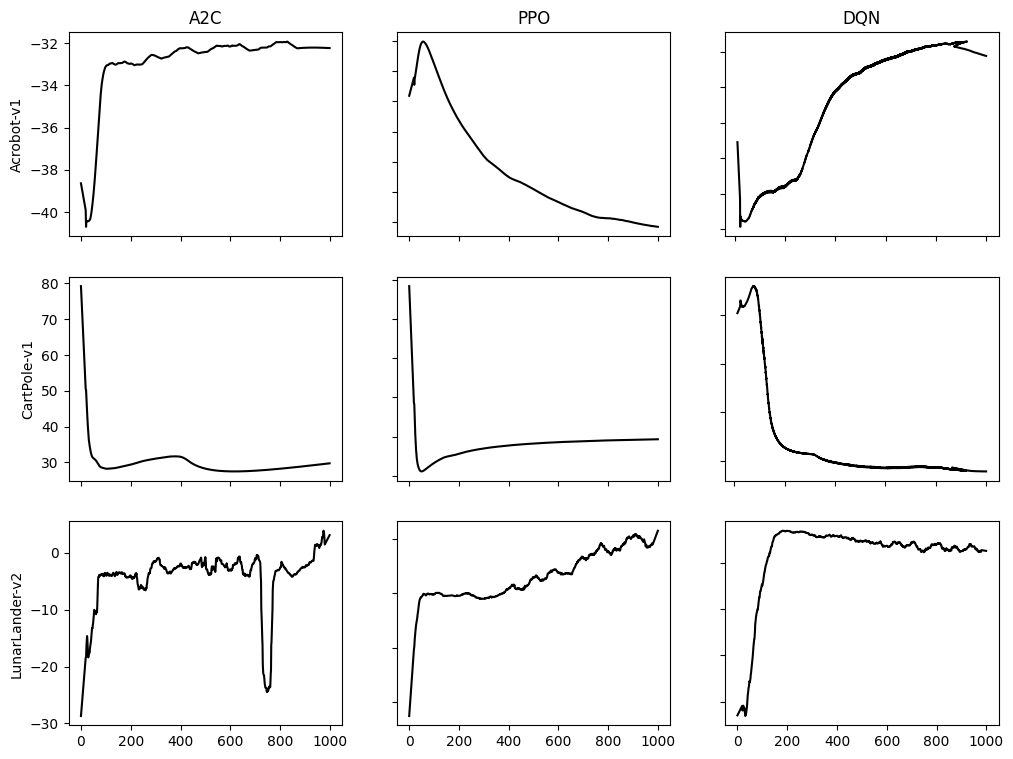

In [37]:
grid_plot_base(envs=utils.all_envs_discrete,policies=utils.all_policies_discrete)